<a href="https://colab.research.google.com/github/ming80302/SOARS/blob/main/rd_csv_soar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

read csv file and plot time series dataFrame

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt

### 1 Read and plot PRISM dataset

read  /content/drive/MyDrive/data/SOARS/prec_prism_monsoon.txt
from  2021-07-01 00:00:00  to  2021-08-31 00:00:00


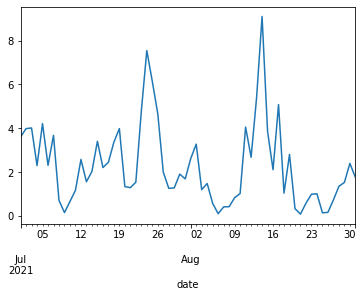

In [18]:
dir_i = '/content/drive/MyDrive/data/SOARS/'
flnm = dir_i + 'prec_prism_monsoon.txt'
print('read ', flnm)
 
df_prism = pd.read_csv(flnm, header = None, delim_whitespace=True)

# add column names and index
df_prism.columns = ['date','prec']
 
df_prism.index = df_prism.date
 
# convert date index to DateTime index for the plot of x-axis 
df_prism.index = pd.to_datetime(df_prism.index, format='%Y%m%d')

# convert pandas timestamp to datetime
date_s = df_prism.index[0].to_pydatetime()
date_e = df_prism.index[-1].to_pydatetime()
print('from ', date_s, ' to ', date_e)

df_prism.prec.plot();

### 2 Read and plot 50-ECMWF precipitation

read  /content/drive/MyDrive/data/SOARS/prec_ecmwf_monsoon.txt


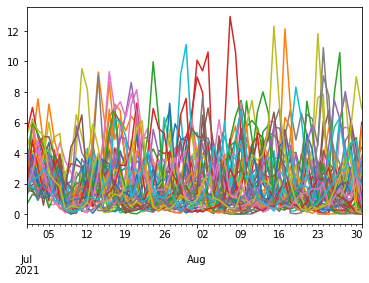

In [58]:

flnm = dir_i + 'prec_ecmwf_monsoon.txt'
print('read ', flnm)
 
df = pd.read_csv(flnm, header = None, delim_whitespace=True)

# create column names for dateFrame
list = ['year','month', 'day']
for nm in range(1,51):
  mem = 'mem' + '%02d'%nm
  list.append(mem)

df.columns = list

# create index
n_date = len(df)
 
date_s = datetime.datetime(df.year[0], df.month[0], df.day[0],   0)
date_e = datetime.datetime(df.year[n_date-1], df.month[n_date-1], df.day[n_date-1], 23)
 
date_ind=pd.date_range(date_s, date_e, freq='d')
df.index = date_ind 

data = df.iloc[:,3:]
data.plot(legend=False);

In [57]:
len(data)

62

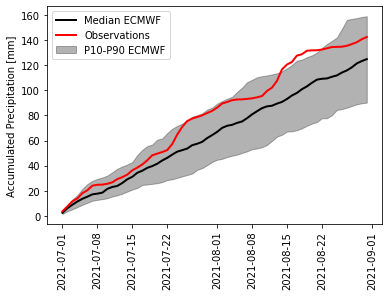

In [20]:
# plot accumulated precipitation
pr_cumsum_ecmwf = np.cumsum(data.values, axis=0)
pr_cumsum_ecmwf_perc = np.percentile(pr_cumsum_ecmwf, (10,50,90), axis=1)
pr_cumsum_obs = np.cumsum(df_prism.prec.values)

plt.plot(data.index, pr_cumsum_ecmwf_perc[1,:], c='k', lw=2, label = 'Median ECMWF')
plt.fill_between(data.index, pr_cumsum_ecmwf_perc[0,:], pr_cumsum_ecmwf_perc[2,:], color='k', alpha=0.3, label = 'P10-P90 ECMWF')
plt.plot(data.index, pr_cumsum_obs, c='r', lw=2, label = 'Observations')
plt.ylabel('Accumulated Precipitation [mm]')
plt.xticks(rotation = 90)
plt.legend()

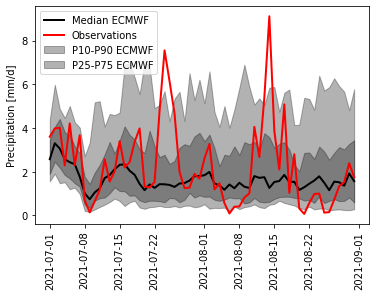

In [21]:
# plot ensemble mean precipitation and ensemble spread
pr_ecmwf = df.iloc[:,:50].values
pr_ecmwf_percentiles = np.percentile(pr_ecmwf, (10,25,50,75,90), axis=1)
plt.plot(data.index, pr_ecmwf_percentiles[2,:], c='k', lw=2, label = 'Median ECMWF')
plt.fill_between(data.index, pr_ecmwf_percentiles[0,:], pr_ecmwf_percentiles[4,:], color='k', alpha=0.3, label = 'P10-P90 ECMWF')
plt.fill_between(data.index, pr_ecmwf_percentiles[1,:], pr_ecmwf_percentiles[3,:], color='k', alpha=0.3, label = 'P25-P75 ECMWF')
plt.plot(data.index, df_prism.prec.values, c='r', lw=2, label = 'Observations')
plt.ylabel('Precipitation [mm/d]')
plt.xticks(rotation = 90)
plt.legend()

 ### 3 plot precipitation of specific member and overlay PRISM dataset

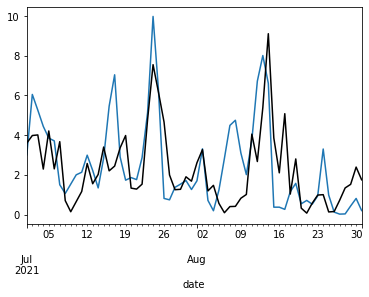

In [22]:
# (1) to plot specific member
# (2) overlay PRISM
data = df.iloc[:,45]
data.plot()
df_prism.prec.plot(color='black');

### 4 read era5 Weather type

read  /content/drive/MyDrive/data/SOARS/wt_era5_ca.txt
2021-10-01 00:00:00 - 2021-11-30 23:00:00
[ 1  2  3  4  5  6  7  8  9 10 11 12]


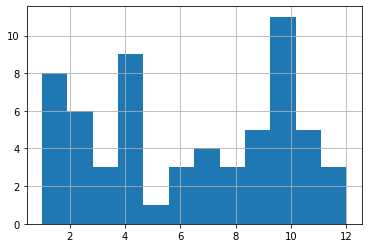

In [23]:
flnm = dir_i + 'wt_era5_ca.txt'
print('read ', flnm)
 
df_era5 = pd.read_csv(flnm, header = None, delim_whitespace=True)
#print(df_era5.head())

# add column names and index
df_era5.columns = ['year', 'month','day', 'WT']

# create index
n_date = len(df_era5)
 
date_s = datetime.datetime(df_era5.year[0], df_era5.month[0], df_era5.day[0],   0)
date_e = datetime.datetime(df_era5.year[n_date-1], df_era5.month[n_date-1], df_era5.day[n_date-1], 23)

print(date_s, '-', date_e)
date_ind=pd.date_range(date_s, date_e, freq='d')
df_era5.index = date_ind

n_unique=np.unique(df_era5.WT.values)
n_unique
print(n_unique)
df_era5.WT.hist(bins=len(n_unique));





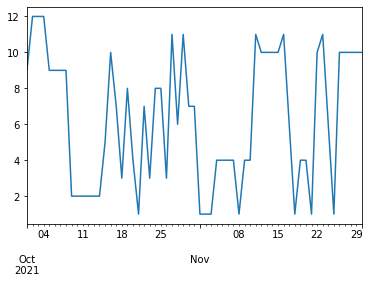

In [24]:
# convert date index to DateTime index for the plot of x-axis 
df_era5.index = pd.to_datetime(df_era5.index)
df_era5.WT.plot();

### 5 read and plot ECMWF weather type

read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_ca.txt
[ 1  2  3  4  5  6  7  8  9 10 11 12] ------


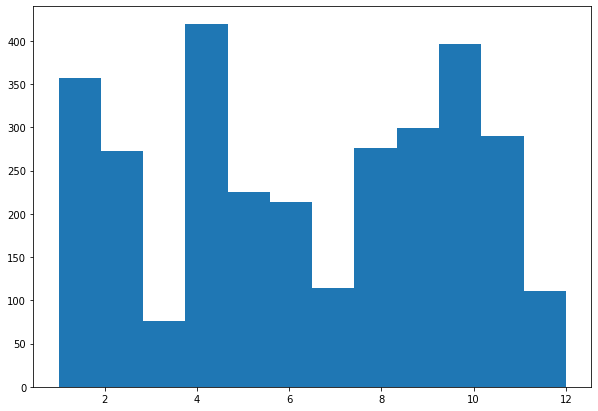

In [25]:
flnm = dir_i + 'wt_ecmwf_ca.txt'	
print('read ', flnm)
 
df_ec = pd.read_csv(flnm, header = None, delim_whitespace=True)

# create column names for dateFrame
list = ['year','month', 'day']
for nm in range(1,51):
  mem = 'mem' + '%02d'%nm
  list.append(mem)

df_ec.columns = list

# create index
n_date = len(df)
 
df_ec.index = date_ind 
#print(df_ec.head)

data = df_ec.iloc[:,3:].values.flatten() ##.stack()
n_unique = np.unique(data)
print(n_unique, '------')

fig = plt.figure(figsize =(10, 7))
 
plt.hist(data, bins = len(n_unique));

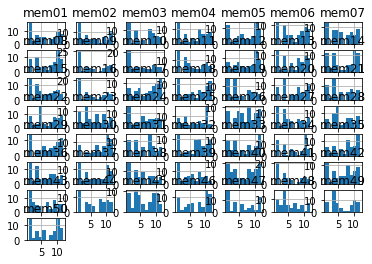

In [26]:
data_p = df_ec.iloc[:,3:59]
 
data_p.hist();

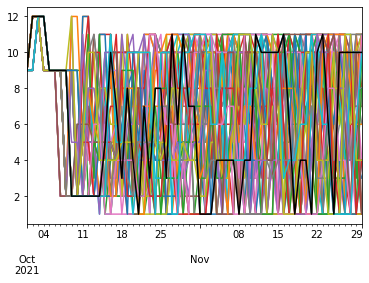

In [27]:
# Time Series plot
data = df_ec.iloc[:,3:]
data.plot(legend=False);
df_era5.WT.plot(color='black')

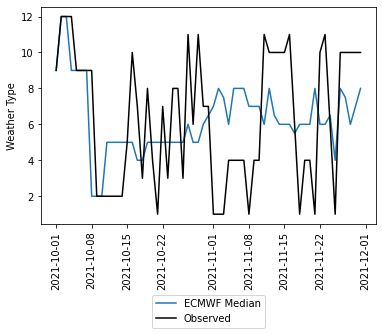

In [30]:
# Time Series plot
data = np.median(np.array(df_ec.iloc[:,3:]), axis=1,)
plt.plot(df_era5.WT.index, data, label = 'ECMWF Median');
plt.plot(df_era5.WT.index, df_era5.WT.values, c='k',label='Observed')
plt.xticks(rotation = 90)
plt.ylabel('Weather Type')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc = 'lower center')

In [34]:
aa=np.array(df_ec.iloc[:,3:])
aa.shape

(61, 50)

In [54]:
df_ec


,year,month,day,mem01,mem02,mem03,mem04,mem05,mem06,mem07,...,mem41,mem42,mem43,mem44,mem45,mem46,mem47,mem48,mem49,mem50
2021-10-01,2021,10,1,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2021-10-02,2021,10,2,12,12,12,9,12,12,9,...,9,12,9,12,9,12,12,12,12,9
2021-10-03,2021,10,3,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2021-10-04,2021,10,4,9,9,9,12,9,9,12,...,9,9,12,9,9,12,9,9,9,12
2021-10-05,2021,10,5,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,2021,11,26,10,3,4,11,11,11,1,...,1,11,1,10,8,8,4,1,1,1
2021-11-27,2021,11,27,4,1,4,7,11,11,4,...,1,11,10,10,8,6,4,7,11,1
2021-11-28,2021,11,28,4,1,8,7,10,10,4,...,1,8,10,10,1,1,1,11,11,1
2021-11-29,2021,11,29,4,10,4,11,10,10,1,...,1,6,3,1,10,10,6,11,4,6


In [35]:
data.shape

(61,)

In [50]:
## find most frequent element in a list
def most_frequent(List):
    return max(set(List), key = List.count)

data = np.array(len())
bb = df_ec.iloc[:,3:].values
mylist = bb[0].tolist()
#mylist.shape
print(most_frequent(mylist))

9


In [52]:
bb

array([[ 9,  9,  9, ...,  9,  9,  9],
       [12, 12, 12, ..., 12, 12,  9],
       [12, 12, 12, ..., 12, 12, 12],
       ...,
       [ 4,  1,  8, ..., 11, 11,  1],
       [ 4, 10,  4, ..., 11,  4,  6],
       [ 3,  7,  1, ..., 11,  4, 10]])

In [55]:
n_date

62